In [1]:
#load youtube client
from YoutubeClient import YoutubeClient
from dotenv import load_dotenv
from utils import *
import os

load_dotenv()

GOOGLE_CLIENT_SECRET_PATH = os.getenv("GOOGLE_CLIENT_SECRET_PATH")

ytclient = YoutubeClient(client_secret_path=GOOGLE_CLIENT_SECRET_PATH)

q = "Rep. Marilyn Strickland podcast"

results = ytclient.exhaustive_search(q)

links = get_video_links(results)
links

['https://www.youtube.com/watch?v=siM9H29FVIM',
 'https://www.youtube.com/watch?v=Z_di3duvMS4',
 'https://www.youtube.com/watch?v=kdLLWNYeKd4']

In [2]:
#download videos
#video_paths = download_yt_video_list(links)
video_paths = ['/home/kasimov/notebooks/youtube-crawler/Congresswoman Marilyn Strickland on how GOP spending cuts affect HBCUs, plans to fight back.mp4', \
               '/home/kasimov/notebooks/youtube-crawler/Julián Castro, Rep. Marilyn Strickland & Darren Walker on building a just society (Full Stream 3_30).mp4', \
               '/home/kasimov/notebooks/youtube-crawler/Let’s be honest about "identity politics" (ft. Rep. Marilyn Strickland) _ Raging Moderates.mp4']

In [3]:
#load embeddings and label_map
embeddings_directory="/home/kasimov/notebooks/LegislatorImagePipeline/Senate_Embeddings"

embeddings, label_map = load_embeddings(embeddings_directory, omitSuffix="Facenet_Embeddings.npy")

In [4]:
#calculate centroids

centroids = calculate_centroids(embeddings)

print(centroids.shape)
label_map

(4, 512)


{0: 'Rep_Harriet_M_Hageman_',
 1: 'Rep_Riley_M_Moore_',
 2: 'Rep_Marilyn_Strickland_',
 3: 'Rep_Yassamin_Ansari_'}

In [5]:
from utils import *
from FrameLabeller import FrameLabeller

labeller = FrameLabeller(data_points=centroids)

2025-09-18 23:22:37.011875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
all_labels = []

for video_path in video_paths:
    labels = labeller.process(video_path, interval=10, batch_size=16)
    all_labels.append(labels)

16
[0, 299, 598, 897, 1196, 1495, 1794, 2093, 2392, 2691, 2990, 3289, 3588, 3887, 4186, 4485]
16
[4784, 5083, 5382, 5681, 5980, 6279, 6578, 6877, 7176, 7475, 7774, 8073, 8372, 8671, 8970, 9269]
16
[9568, 9867, 10166, 10465, 10764, 11063, 11362, 11661, 11960, 12259, 12558, 12857, 13156, 13455, 13754, 14053]
16
[14352, 14651, 14950, 15249, 15548, 15847, 16146, 16445, 16744, 17043, 17342, 17641, 17940, 18239, 18538, 18837]
16
[19136, 19435, 19734, 20033, 20332, 20631, 20930, 21229, 21528, 21827, 22126, 22425, 22724, 23023, 23322, 23621]
16
[23920, 24219, 24518, 24817, 25116, 25415, 25714, 26013, 26312, 26611, 26910, 27209, 27508, 27807, 28106, 28405]
16
[28704, 29003, 29302, 29601, 29900, 30199, 30498, 30797, 31096, 31395, 31694, 31993, 32292, 32591, 32890, 33189]
16
[33488, 33787, 34086, 34385, 34684, 34983, 35282, 35581, 35880, 36179, 36478, 36777, 37076, 37375, 37674, 37973]
3
[38272, 38571, 38870]
16
[0, 299, 598, 897, 1196, 1495, 1794, 2093, 2392, 2691, 2990, 3289, 3588, 3887, 4186, 

In [7]:
all_labels[0]

{0: [{'label': 1, 'score': 0.08408132940530777},
  {'label': 3, 'score': 0.16319096088409424}],
 299: [{'label': 3, 'score': 0.1327664852142334},
  {'label': 1, 'score': 0.19534221291542053}],
 598: [{'label': 1, 'score': 0.24601495265960693},
  {'label': 1, 'score': 0.2566607594490051}],
 897: [{'label': 2, 'score': 0.7917045950889587},
  {'label': 1, 'score': 0.2383824735879898}],
 1196: [{'label': 2, 'score': 0.8999871015548706}],
 1495: [{'label': 2, 'score': 0.8344467282295227},
  {'label': 2, 'score': 0.7778715491294861}],
 1794: [{'label': 1, 'score': 0.30456629395484924},
  {'label': 2, 'score': 0.8169465065002441}],
 2093: [{'label': 1, 'score': 0.29709291458129883},
  {'label': 2, 'score': 0.8320162296295166}],
 2392: [{'label': 1, 'score': 0.3197479248046875},
  {'label': 1, 'score': 0.2820826470851898}],
 2691: [{'label': 2, 'score': 0.8671712875366211}],
 2990: [{'label': 1, 'score': 0.2714133560657501}],
 3289: [{'label': 2, 'score': 0.8305140733718872},
  {'label': 2, 's

In [14]:
for labels in all_labels:    
    for key in labels:
        print(f"Frame {key}:")
        for entry in labels[key]:
            label_idx = entry["label"]
            score = entry["score"]
            name = label_map[label_idx]
            print(f"   {name} (score={score:.3f})")
    print("====================================")

Frame 0:
   Rep_Riley_M_Moore_ (score=0.084)
   Rep_Yassamin_Ansari_ (score=0.163)
Frame 299:
   Rep_Yassamin_Ansari_ (score=0.133)
   Rep_Riley_M_Moore_ (score=0.195)
Frame 598:
   Rep_Riley_M_Moore_ (score=0.246)
   Rep_Riley_M_Moore_ (score=0.257)
Frame 897:
   Rep_Marilyn_Strickland_ (score=0.792)
   Rep_Riley_M_Moore_ (score=0.238)
Frame 1196:
   Rep_Marilyn_Strickland_ (score=0.900)
Frame 1495:
   Rep_Marilyn_Strickland_ (score=0.834)
   Rep_Marilyn_Strickland_ (score=0.778)
Frame 1794:
   Rep_Riley_M_Moore_ (score=0.305)
   Rep_Marilyn_Strickland_ (score=0.817)
Frame 2093:
   Rep_Riley_M_Moore_ (score=0.297)
   Rep_Marilyn_Strickland_ (score=0.832)
Frame 2392:
   Rep_Riley_M_Moore_ (score=0.320)
   Rep_Riley_M_Moore_ (score=0.282)
Frame 2691:
   Rep_Marilyn_Strickland_ (score=0.867)
Frame 2990:
   Rep_Riley_M_Moore_ (score=0.271)
Frame 3289:
   Rep_Marilyn_Strickland_ (score=0.831)
   Rep_Marilyn_Strickland_ (score=0.863)
Frame 3588:
   Rep_Marilyn_Strickland_ (score=0.839)
   R

In [15]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def plot_similarity_from_labels(labels_dict, centroid_key):
    all_names = []
    all_scores = []

    for frame_id, entries in labels_dict.items():
        for entry in entries:
            label_idx = entry["label"]
            score = entry["score"]
            name = centroid_key[label_idx][:-19]  # strip _Face_Embeddings or similar suffix
            all_names.append(name)
            all_scores.append(score * 100)  # convert to %

    if not all_names:
        print("No data to plot.")
        return

    plt.figure(figsize=(12, 6))
    plt.scatter(all_names, all_scores, alpha=0.7, color='darkgreen')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Detected Person")
    plt.ylabel("Cosine Similarity (%)")
    plt.title("Face Recognition Similarity Scores")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

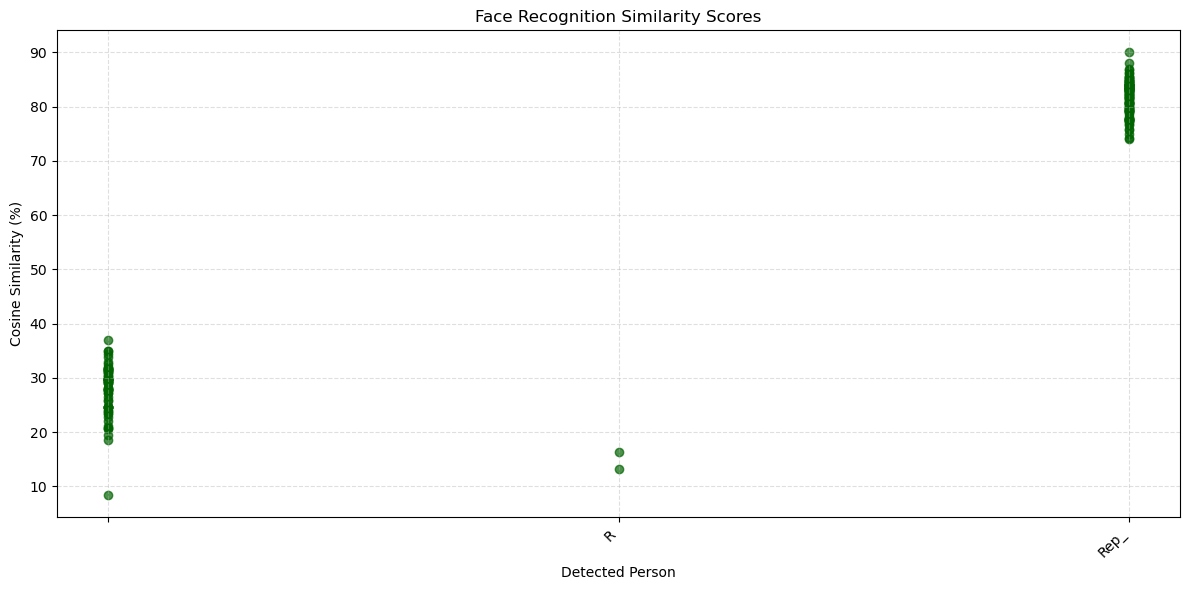

In [17]:
plot_similarity_from_labels(all_labels[0], label_map)

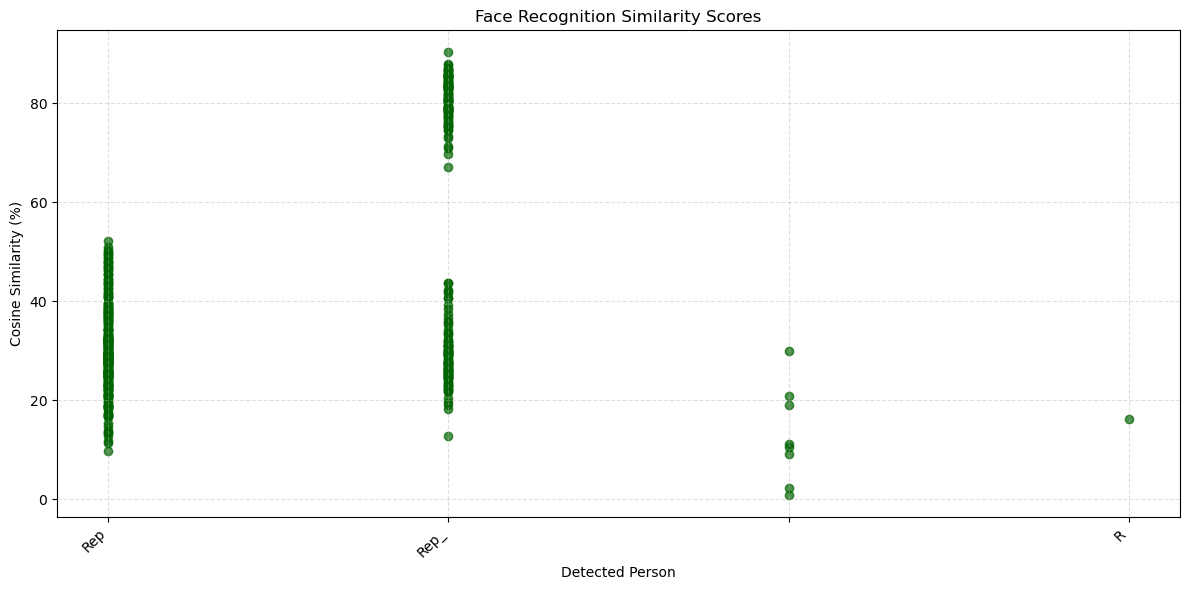

In [18]:
plot_similarity_from_labels(all_labels[1], label_map)

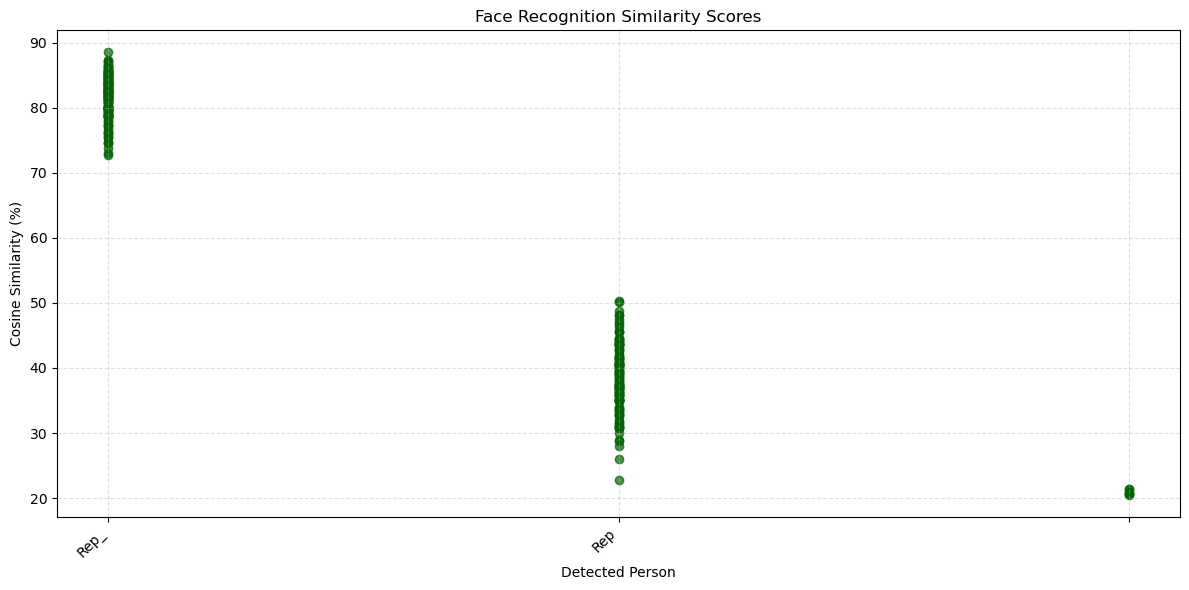

In [19]:
plot_similarity_from_labels(all_labels[2], label_map)